In [31]:
import fitsio
import astropy.io.fits as fits
import pylab as pl
import numpy as np

from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord
from astropy import units as u

In [28]:
lbgs = Table.read('/global/cscratch1/sd/mjwilson/secondary/sv1/raw/Mar21/LBG_LBGLAE.fits')
tmgs = Table.read('/global/cfs/cdirs/desi/target/secondary/sv1/indata/LBG_TOMOG.fits')
dups = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/tomog/lbglae-matches.fits')

In [29]:
exclude = np.isin(lbgs['ID'], dups['ID'])

lbgs = lbgs[~exclude]

In [32]:
lbgs['RA']  = lbgs['RA'].data.astype('>f8')
lbgs['DEC'] = lbgs['DEC'].data.astype('>f8')

In [13]:
dat  = fitsio.read('/global/cscratch1/sd/mjwilson/SCNDCOSMOS/fiberassign-082000.fits.gz')

In [14]:
dat['TARGET_RA']

array([149.80223123, 149.89306089, 150.00712684, ..., 150.66756626,
       150.64278697, 150.78439012])

In [15]:
dat['TARGET_DEC']

array([1.03722321, 1.1090335 , 1.12826224, ..., 1.3720464 , 1.29189284,
       1.38737883])

In [82]:
sc_target = SkyCoord(ra=dat['TARGET_RA']*u.degree, dec=dat['TARGET_DEC']*u.degree)

sc_tmgs   = SkyCoord(ra=tmgs['RA']*u.degree, dec=tmgs['DEC']*u.degree)
sc_lbgs   = SkyCoord(ra=lbgs['RA']*u.degree, dec=lbgs['DEC']*u.degree)

In [89]:
idx, d2d, d3d = sc_target.match_to_catalog_sky(sc_tmgs)

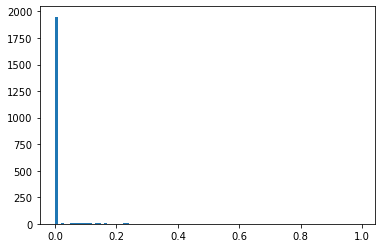

In [90]:
_ = pl.hist(d2d.arcsec, bins=np.arange(0.0, 1., 0.01))

In [91]:
np.mean(d2d.arcsec < 0.2)

0.4028

In [92]:
idx = idx[d2d.arcsec < 0.1]

(array([ 50.,  43.,  13.,   6.,   5.,   2.,   5.,   6.,   2.,   2.,   4.,
          1.,   1.,   9.,   3.,  11.,   6.,   2.,  18.,  32.,  56.,  89.,
        120., 131., 135., 135., 101., 135., 152., 175., 151., 123.,  95.,
         86.,  50.,  15.,   7.,   3.,   4.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <a list of 49 Patch objects>)

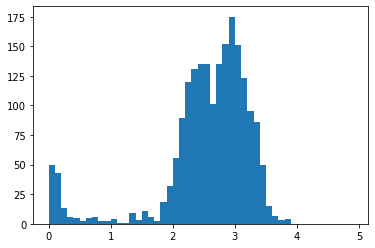

In [93]:
pl.hist(tmgs[idx]['PHOTO_Z'], bins=np.arange(0.0, 5.0, 0.1))

In [94]:
np.mean(tmgs[idx]['PHOTO_Z'] < 0.5)

0.05894206549118388

In [95]:
assigned_tmgs = tmgs[idx]

In [71]:
idx, d2d, d3d = sc_target.match_to_catalog_sky(sc_lbgs)

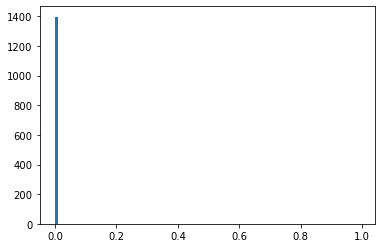

In [72]:
_ = pl.hist(d2d.arcsec, bins=np.arange(0.0, 1., 0.01))

In [73]:
np.mean(d2d.arcsec < 0.1)

0.2808

In [74]:
idx = idx[d2d.arcsec < 0.1]

In [75]:
lbgs[idx]

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,FUV_err,NUV_err,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,PRIORITY,TILEID,SAMPLE,TARGETID,SUBPRIORITY,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,US,US_ERR,G,G_ERR,R,R_ERR,I,I_ERR,Z,Z_ERR,Y,Y_ERR,YV,YV_ERR,J_ERR,H_ERR,KS,KS_ERR
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int32,bytes9,int64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1625984,150.1986239568945,1.1890183662273563,0,7,True .. False,0.017085034746864246,-99.0,-99.0,-13.724,-14.026,-14.75,-15.022,-15.638,-16.019,-16.14,-16.336,-16.421,-16.445,-16.512,-16.682,-16.488,-99.0,0.1694,11,0.432884,12.7436,6.33061,28,84,1,0.1746,0.1256,0.2228,2.7,0.06,0.1746,0.1746,9,6000,2068,CLAUDS-U,1701,0.5017943149913174,0.0,0.0,0.0,False,29.983,1000.0,25.163,0.094,24.193,0.013,23.671,0.015,23.371,0.014,23.286,0.02,23.224,0.05,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1773782,149.84749220517747,1.0345852595890423,0,7,True .. False,0.020885814870131504,-99.0,-99.0,-21.536,-21.998,-22.512,-22.608,-22.913,-23.114,-23.36,-23.588,-23.702,-23.751,-23.878,-24.105,-23.947,-99.0,2.7382,11,2.02179,4.52704,2.90904,29,84,30,2.7584,2.6,2.8752,0.08,2.98,2.7584,2.7584,11,6000,2068,CLAUDS-U,1845,0.6718347495840757,0.0,0.0,0.0,False,25.905,0.159,25.018,0.227,24.153,0.045,23.709,0.045,23.449,0.046,23.311,0.061,23.207,0.13,-99.025,1000.0,1000.0,1000.0,-99.008,1000.0
1786604,149.90322794346622,1.182928932419144,0,7,True .. False,0.018353040841610702,-99.0,-99.0,-21.387,-21.653,-22.191,-22.34,-22.752,-22.941,-23.125,-23.299,-23.399,-23.433,-23.508,-23.678,-23.488,-99.0,2.3644,11,2.46471,27.7334,10.7802,31,49,4,2.3181,0.0404,2.401,0.02,2.44,2.3181,2.3181,3,6000,2068,CLAUDS-BX,8491,0.5972551736518854,0.0,0.0,0.0,False,24.605,0.02,24.402,0.05,23.747,0.01,23.461,0.013,23.379,0.015,23.226,0.02,23.203,0.049,-99.022,1000.0,1000.0,1000.0,-99.007,1000.0
1700336,150.0806009679944,1.2277486590696205,0,6,False .. False,0.017570328467251768,-99.0,-99.0,-20.748,-21.128,-21.597,-21.716,-22.077,-22.276,-22.453,-22.609,-22.691,-22.715,-22.802,-22.922,-22.688,-99.0,0.122,11,3.69916,5.73622,4.31181,27,60,1,2.292,0.0849,2.5845,2.46,0.06,2.292,2.292,7,4000,2068,CLAUDS-BX,12127,0.6314747428998438,0.0,0.0,0.0,False,25.246,0.101,26.491,0.809,24.362,0.036,24.063,0.057,23.869,0.052,23.753,0.08,23.984,0.244,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1697839,150.05170434580776,1.1604002297231408,0,5,True .. False,0.016626839143464446,-99.0,-99.0,-20.711,-21.388,-21.723,-21.792,-21.965,-22.046,-22.148,-22.241,-22.281,-22.288,-22.294,-22.31,-22.01,-99.0,3.8376,9,0.438052,2.43904,0.214632,23,108,8,3.744,0.6492,4.0672,0.36,3.6,3.744,3.744,10,3000,2068,CLAUDS-G,20437,0.9663537845947289,0.0,0.0,0.0,False,-99.08,-99.0,-99.078,-99.0,27.238,0.256,25.517,0.091,25.091,0.081,24.742,0.091,24.926,0.271,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1694232,150.03487280590156,1.1987929433178963,0,7,True .. False,0.01682775254143417,-99.0,-99.0,-21.137,-21.436,-22.646,-22.911,-23.509,-23.623,-23.687,-23.766,-23.825,-23.835,-23.817,-23.899,-23.655,-99.0,3.0283,11,2.64551,1.80148,1.93688,26,230,4,3.0456,2.9081,3.1645,0.14,2.9,3.0456,3.0456,1,5000,2068,CLAUDS-U,2703,0.8229898704404633,0.0,0.0,0.0,False,27.842,1.021,26.495,0.255,25.154,0.035,24.396,0.03,24.112,0.028,24.059,0.044,24.042,0.104,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1689943,150.02904548903518,1.11659917907

In [76]:
np.unique(lbgs[idx]['SAMPLE'], return_counts=True)

(<Column name='SAMPLE' dtype='bytes9' length=3>
 CLAUDS-BX
  CLAUDS-G
  CLAUDS-U,
 array([500, 602, 302]))

(array([62., 34.,  9., 16., 14.,  8.,  1.,  3.,  2.,  4.,  3.,  2.,  3.,
         5.,  3.,  6.,  3.,  0.,  5., 12., 25., 51., 69., 87., 31., 38.,
        43., 58., 46., 68., 49., 50., 49., 50., 61., 81., 79., 71., 67.,
        46., 29., 18., 18., 17.,  4.,  1.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <a list of 49 Patch objects>)

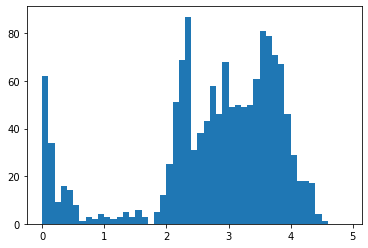

In [77]:
pl.hist(lbgs[idx]['Z_BC03'], bins=np.arange(0.0, 5.0, 0.1))

In [78]:
np.mean(lbgs[idx]['Z_BC03'] < 0.5)

0.09829059829059829

In [80]:
assigned_lbgs = lbgs[idx]

In [97]:
assigned_lbgs

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,FUV_err,NUV_err,MAG_ABS_FUV,MAG_ABS_NUV,MAG_ABS_u,MAG_ABS_uS,MAG_ABS_g,MAG_ABS_r,MAG_ABS_i,MAG_ABS_z,MAG_ABS_y,MAG_ABS_Yv,MAG_ABS_J,MAG_ABS_H,MAG_ABS_Ks,Z_SPEC,Z_BEST,NBAND_USED,CHI_BEST,CHI_STAR,CHI_QSO,MOD_BEST,MOD_STAR,MOD_QSO,Z_ML,Z_ML68_LOW,Z_ML68_HIGH,Z_SEC,Z_QSO,Z_BC03,ZPHOT,MOD_BEST_BC03,PRIORITY,TILEID,SAMPLE,TARGETID,SUBPRIORITY,PMRA,PMDEC,REF_EPOCH,OVERRIDE,U,U_ERR,US,US_ERR,G,G_ERR,R,R_ERR,I,I_ERR,Z,Z_ERR,Y,Y_ERR,YV,YV_ERR,J_ERR,H_ERR,KS,KS_ERR
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int32,bytes9,int64,float64,float32,float32,float32,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1625984,150.1986239568945,1.1890183662273563,0,7,True .. False,0.017085034746864246,-99.0,-99.0,-13.724,-14.026,-14.75,-15.022,-15.638,-16.019,-16.14,-16.336,-16.421,-16.445,-16.512,-16.682,-16.488,-99.0,0.1694,11,0.432884,12.7436,6.33061,28,84,1,0.1746,0.1256,0.2228,2.7,0.06,0.1746,0.1746,9,6000,2068,CLAUDS-U,1701,0.5017943149913174,0.0,0.0,0.0,False,29.983,1000.0,25.163,0.094,24.193,0.013,23.671,0.015,23.371,0.014,23.286,0.02,23.224,0.05,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1773782,149.84749220517747,1.0345852595890423,0,7,True .. False,0.020885814870131504,-99.0,-99.0,-21.536,-21.998,-22.512,-22.608,-22.913,-23.114,-23.36,-23.588,-23.702,-23.751,-23.878,-24.105,-23.947,-99.0,2.7382,11,2.02179,4.52704,2.90904,29,84,30,2.7584,2.6,2.8752,0.08,2.98,2.7584,2.7584,11,6000,2068,CLAUDS-U,1845,0.6718347495840757,0.0,0.0,0.0,False,25.905,0.159,25.018,0.227,24.153,0.045,23.709,0.045,23.449,0.046,23.311,0.061,23.207,0.13,-99.025,1000.0,1000.0,1000.0,-99.008,1000.0
1786604,149.90322794346622,1.182928932419144,0,7,True .. False,0.018353040841610702,-99.0,-99.0,-21.387,-21.653,-22.191,-22.34,-22.752,-22.941,-23.125,-23.299,-23.399,-23.433,-23.508,-23.678,-23.488,-99.0,2.3644,11,2.46471,27.7334,10.7802,31,49,4,2.3181,0.0404,2.401,0.02,2.44,2.3181,2.3181,3,6000,2068,CLAUDS-BX,8491,0.5972551736518854,0.0,0.0,0.0,False,24.605,0.02,24.402,0.05,23.747,0.01,23.461,0.013,23.379,0.015,23.226,0.02,23.203,0.049,-99.022,1000.0,1000.0,1000.0,-99.007,1000.0
1700336,150.0806009679944,1.2277486590696205,0,6,False .. False,0.017570328467251768,-99.0,-99.0,-20.748,-21.128,-21.597,-21.716,-22.077,-22.276,-22.453,-22.609,-22.691,-22.715,-22.802,-22.922,-22.688,-99.0,0.122,11,3.69916,5.73622,4.31181,27,60,1,2.292,0.0849,2.5845,2.46,0.06,2.292,2.292,7,4000,2068,CLAUDS-BX,12127,0.6314747428998438,0.0,0.0,0.0,False,25.246,0.101,26.491,0.809,24.362,0.036,24.063,0.057,23.869,0.052,23.753,0.08,23.984,0.244,-99.021,1000.0,1000.0,1000.0,-99.006,1000.0
1697839,150.05170434580776,1.1604002297231408,0,5,True .. False,0.016626839143464446,-99.0,-99.0,-20.711,-21.388,-21.723,-21.792,-21.965,-22.046,-22.148,-22.241,-22.281,-22.288,-22.294,-22.31,-22.01,-99.0,3.8376,9,0.438052,2.43904,0.214632,23,108,8,3.744,0.6492,4.0672,0.36,3.6,3.744,3.744,10,3000,2068,CLAUDS-G,20437,0.9663537845947289,0.0,0.0,0.0,False,-99.08,-99.0,-99.078,-99.0,27.238,0.256,25.517,0.091,25.091,0.081,24.742,0.091,24.926,0.271,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1694232,150.03487280590156,1.1987929433178963,0,7,True .. False,0.01682775254143417,-99.0,-99.0,-21.137,-21.436,-22.646,-22.911,-23.509,-23.623,-23.687,-23.766,-23.825,-23.835,-23.817,-23.899,-23.655,-99.0,3.0283,11,2.64551,1.80148,1.93688,26,230,4,3.0456,2.9081,3.1645,0.14,2.9,3.0456,3.0456,1,5000,2068,CLAUDS-U,2703,0.8229898704404633,0.0,0.0,0.0,False,27.842,1.021,26.495,0.255,25.154,0.035,24.396,0.03,24.112,0.028,24.059,0.044,24.042,0.104,-99.02,1000.0,1000.0,1000.0,-99.006,1000.0
1689943,150.02904548903518,1.11659917907

In [98]:
assigned_tmgs['PHOTO_Z'].data

array([2.3161, 2.0206, 2.9195, ..., 2.754 , 3.0335, 2.1015])

In [99]:
assigned_lbgs['Z_BC03'].data

array([0.1746, 2.7584, 2.3181, ..., 2.5216, 0.0792, 2.2116])

In [102]:
all_drops = np.concatenate((assigned_tmgs['PHOTO_Z'].data, assigned_lbgs['Z_BC03'].data))

(array([112.,  77.,  22.,  22.,  19.,  10.,   6.,   9.,   4.,   6.,   7.,
          3.,   4.,  14.,   6.,  17.,   9.,   2.,  23.,  44.,  81., 140.,
        189., 218., 166., 173., 144., 193., 198., 243., 200., 173., 144.,
        136., 111.,  96.,  86.,  74.,  71.,  46.,  29.,  18.,  18.,  17.,
          4.,   1.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <a list of 49 Patch objects>)

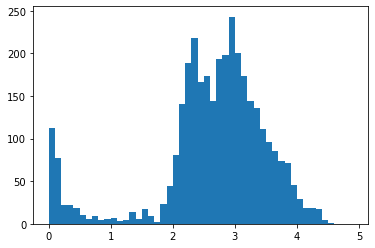

In [103]:
pl.hist(all_drops, bins=np.arange(0.0, 5.0, 0.1))

In [104]:
np.mean(all_drops < 0.5)

0.07524343464148717

In [107]:
np.count_nonzero(all_drops > 3.5)

461

In [108]:
len(assigned_tmgs), len(assigned_lbgs)

(1985, 1404)

In [109]:
1985 + 1404

3389